# Install package

In [1]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 21.6 MB/s 


# Import packages

In [2]:
import numpy as np
import pandas as pd 
import os
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import sweetviz as sv

# Load Data

In [3]:
data_location = "bank-full.csv"
data_url = 'https://github.com/diwakarsachan/marketing-project-final/raw/main/bank-full.csv'

if not os.path.exists (data_location):
    data_location = os.path.basename(data_location)
    if not os.path.exists(data_location):
        print("Downloading : ", data_url)
        urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)

data_location: bank-full.csv


In [4]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

marketing_outcome = pd.read_csv(data_location, sep=';')
marketing_outcome.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4613,33,blue-collar,married,secondary,no,0,yes,yes,unknown,20,may,114,1,-1,0,unknown,no
9732,57,services,married,secondary,no,1166,no,no,unknown,9,jun,106,1,-1,0,unknown,no
14107,29,blue-collar,married,primary,no,243,no,yes,cellular,11,jul,109,2,-1,0,unknown,no
7735,37,management,single,tertiary,no,614,yes,no,unknown,30,may,371,2,-1,0,unknown,no
16790,54,entrepreneur,married,tertiary,no,1544,no,yes,cellular,24,jul,82,3,-1,0,unknown,no


# Clean up 

In [5]:
marketing_outcome =marketing_outcome.replace({'default': {'yes': 1, 'no': 0}, 'housing': {'yes': 1, 'no': 0}, 'loan': {'yes': 1, 'no': 0}, 'y': {'yes': 1, 'no': 0}})

In [6]:
marketing_outcome.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
19400,31,management,single,tertiary,0,130,0,0,cellular,6,aug,160,1,-1,0,unknown,0
40880,30,management,single,tertiary,0,280,0,0,cellular,12,aug,100,1,-1,0,unknown,0
18116,55,management,married,tertiary,0,33,1,0,cellular,30,jul,246,3,-1,0,unknown,0
16072,27,services,single,tertiary,0,9965,1,0,cellular,22,jul,662,1,-1,0,unknown,0
31769,36,technician,single,secondary,0,524,1,0,cellular,8,apr,95,1,-1,0,unknown,0


# Explore Data (EDA)


In [7]:
# Using sweetviz for EDA
advert_report = sv.analyze(marketing_outcome)
advert_report.show_html('Advertising.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Advertising.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [8]:
marketing_outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 5.9+ MB


In [9]:
## Check data skew
marketing_outcome.y.value_counts(normalize=True)

0   0.88
1   0.12
Name: y, dtype: float64

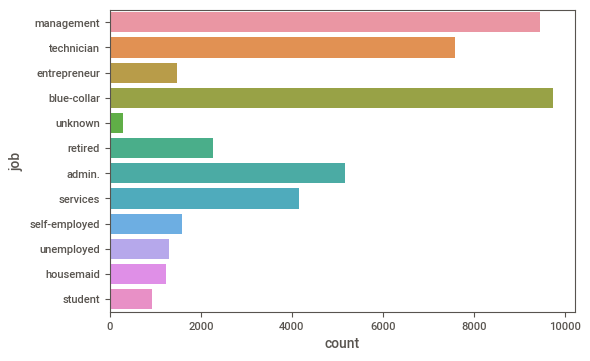

In [10]:
sns.countplot(data=marketing_outcome, y='job')


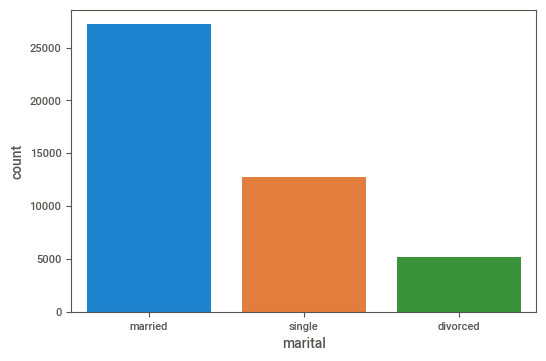

In [11]:
sns.countplot(data=marketing_outcome, x='marital')

In [12]:
categoric = marketing_outcome.select_dtypes(include='O')
for i in categoric.columns:
  print(categoric[i].value_counts())
  print()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64



In [13]:
# Correlation Matrix
marketing_outcome.corr()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
age,1.00,-0.02,0.10,-0.19,-0.02,-0.01,-0.00,0.00,-0.02,0.00,0.03
default,-0.02,1.00,-0.07,-0.01,0.08,0.01,-0.01,0.02,-0.03,-0.02,-0.02
balance,0.10,-0.07,1.00,-0.07,-0.08,0.00,0.02,-0.01,0.00,0.02,0.05
housing,-0.19,-0.01,-0.07,1.00,0.04,-0.03,0.01,-0.02,0.12,0.04,-0.14
loan,-0.02,0.08,-0.08,0.04,1.00,0.01,-0.01,0.01,-0.02,-0.01,-0.07
day,-0.01,0.01,0.00,-0.03,0.01,1.00,-0.03,0.16,-0.09,-0.05,-0.03
duration,-0.00,-0.01,0.02,0.01,-0.01,-0.03,1.00,-0.08,-0.00,0.00,0.39
campaign,0.00,0.02,-0.01,-0.02,0.01,0.16,-0.08,1.00,-0.09,-0.03,-0.07
pdays,-0.02,-0.03,0.00,0.12,-0.02,-0.09,-0.00,-0.09,1.00,0.45,0.10
previous,0.00,-0.02,0.02,0.04,-0.01,-0.05,0.00,-0.03,0.45,1.00,0.09


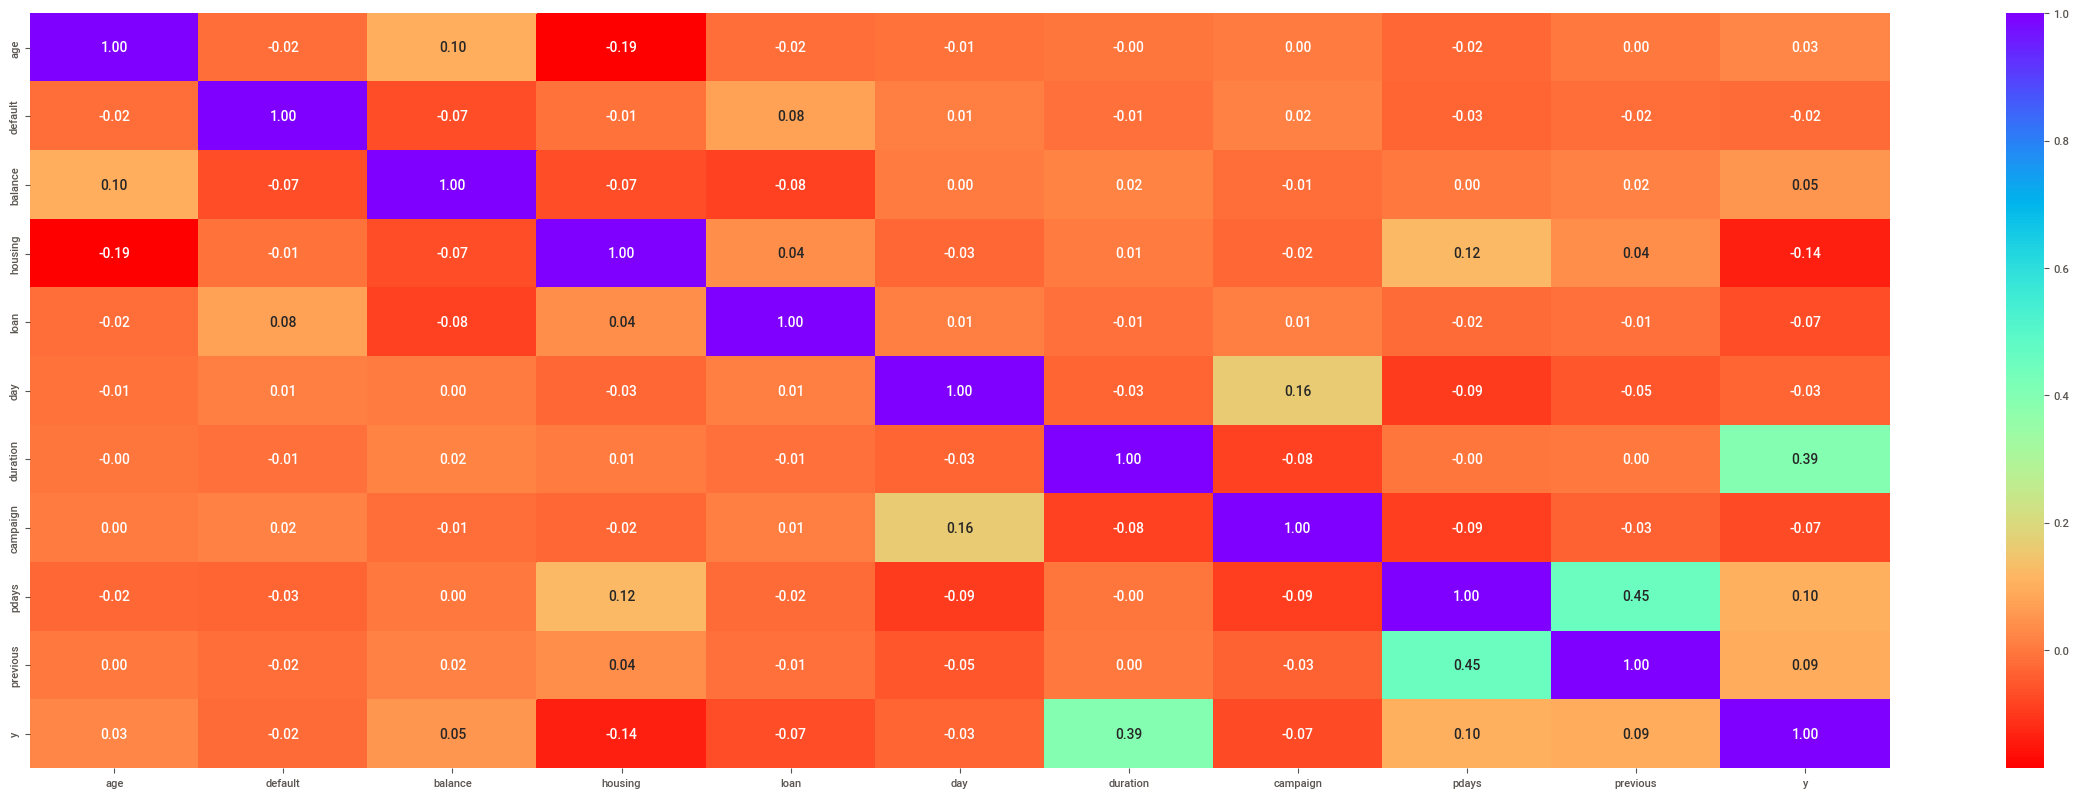

In [14]:
plt.figure(figsize = (30,10))

#sns.set_context("talk", font_scale=0.9) 
sns.heatmap(marketing_outcome.corr(), cmap='rainbow_r', annot=True, fmt='.2f')

# Shape Data

In [15]:
categoric.head()


,job,marital,education,contact,month,poutcome
0,management,married,tertiary,unknown,may,unknown
1,technician,single,secondary,unknown,may,unknown
2,entrepreneur,married,secondary,unknown,may,unknown
3,blue-collar,married,unknown,unknown,may,unknown
4,unknown,single,unknown,unknown,may,unknown


In [16]:
marketing_outcome_final = pd.get_dummies(marketing_outcome, columns=[col for col in marketing_outcome.columns if col in categoric])


In [17]:
print(len(marketing_outcome_final.columns), marketing_outcome_final.columns)

49 Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


In [18]:
numeric_columns = ['age','balance','day', 'duration', 'campaign', 'pdays', 'previous']
df_numeric = marketing_outcome_final[numeric_columns]

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
minmax_scalar = MinMaxScaler()
nd_numeric_transform = minmax_scalar.fit_transform(df_numeric)

In [20]:
df_numeric_transform=pd.DataFrame(np.array(nd_numeric_transform))
df_numeric_transform.columns = numeric_columns

In [21]:
df_numeric_transform.head()

,age,balance,day,duration,campaign,pdays,previous
0,0.52,0.09,0.13,0.05,0.00,0.00,0.00
1,0.34,0.07,0.13,0.03,0.00,0.00,0.00
2,0.19,0.07,0.13,0.02,0.00,0.00,0.00
3,0.38,0.09,0.13,0.02,0.00,0.00,0.00
4,0.19,0.07,0.13,0.04,0.00,0.00,0.00


In [22]:
non_numeric_columns = [i for i in marketing_outcome_final.columns if i not in numeric_columns]

In [23]:
marketing_outcome_final_v2 = pd.concat([df_numeric_transform, marketing_outcome_final[non_numeric_columns]], axis=1) 

In [24]:
marketing_outcome_final_v2.head()

,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.52,0.09,0.13,0.05,0.00,0.00,0.00,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0.34,0.07,0.13,0.03,0.00,0.00,0.00,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,0.19,0.07,0.13,0.02,0.00,0.00,0.00,0,1,1,...,0,0,1,0,0,0,0,0,0,1
3,0.38,0.09,0.13,0.02,0.00,0.00,0.00,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,0.19,0.07,0.13,0.04,0.00,0.00,0.00,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [25]:
label_col = 'y'

feature_columns = marketing_outcome_final_v2.columns
feature_columns = feature_columns.drop (['y']) # What else needs to be dropped??
print (feature_columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'default', 'housing', 'loan', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


In [26]:
X = marketing_outcome_final_v2[feature_columns]
y = marketing_outcome_final_v2[[label_col]]

print (X.shape)
print (y.shape)

(45211, 48)
(45211, 1)


In [27]:
# import library
from imblearn.over_sampling import SMOTE

In [28]:
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)


In [29]:
print('Original dataset shape', len(y))
print('Resample dataset shape', len(y_smote))

Original dataset shape 45211
Resample dataset shape 79844


In [30]:
y_smote.value_counts(normalize=True)

y
0   0.50
1   0.50
dtype: float64

In [31]:
X_train,X_test,y_train, y_test = train_test_split(x_smote,y_smote,  test_size=.2, random_state=123)

print ("x_train :" , X_train.shape )
print ("x_test :", X_test.shape)
print ("y_train :", y_train.shape)
print ("y_test :", y_test.shape)

x_train : (63875, 48)
x_test : (15969, 48)
y_train : (63875, 1)
y_test : (15969, 1)


# Train the algorithm 

### Algorithm
* Logistic
* SVM
* RF
* GB
* MLP
* What else?

In [32]:
%%time

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# algo = LogisticRegression(max_iter=500)
#algo = LinearSVC(max_iter=5000)
# algo = RandomForestClassifier()
#algo = GradientBoostingClassifier()

# Use pipeline to apply scaling on testing data, without leaking training data
algo = make_pipeline(RandomForestClassifier())

# Fit
model = algo.fit(X_train, np.ravel(y_train))  # apply scaling on training data
print (model)

Pipeline(steps=[('randomforestclassifier', RandomForestClassifier())])
CPU times: user 7.7 s, sys: 58.6 ms, total: 7.76 s
Wall time: 7.75 s


# Evaluate Model


In [33]:
y_pred = model.predict (X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [34]:
#F1 score
from sklearn.metrics import f1_score
model_f1_score = f1_score(y_test, y_pred)
print("F1 Score of the model : ", model_f1_score)

F1 Score of the model :  0.943842243860616


In [35]:
train_accuracy = model.score(X_train,y_train)
print ("Train accuracy: ", train_accuracy)

Train accuracy:  1.0


In [36]:
test_accuracy = model.score(X_test, y_test)
print ("Test accuracy: ", test_accuracy)

Test accuracy:  0.9425762414678439


In [37]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import numpy as np

cm_labels = np.unique(y)
cm_array = confusion_matrix(y_test, y_pred)
#print (cm_array)

cm_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)

[]

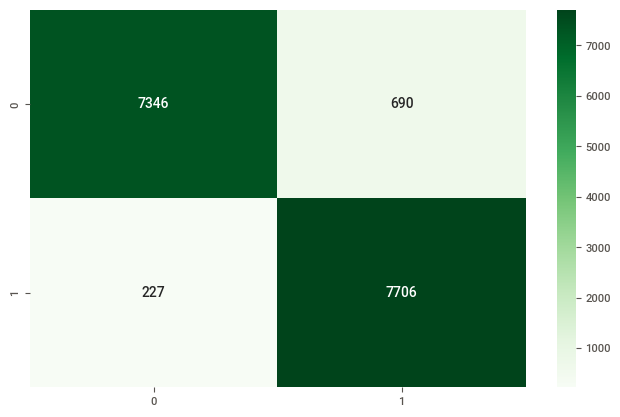

In [38]:
# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm_df, annot=True, cmap="Greens", fmt='d').plot()

In [39]:
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix

In [40]:
auc = roc_auc_score(y_test, y_pred)
print('ROC_AUC_SCORE is', auc)

print('Classification Report:')
print(classification_report(y_test,y_pred))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print('false_positive_rate: ', false_positive_rate)
print('true_positive_rate: ', true_positive_rate)
print('thresholds: ', thresholds)


ROC_AUC_SCORE is 0.9427608692937749
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8036
           1       0.92      0.97      0.94      7933

    accuracy                           0.94     15969
   macro avg       0.94      0.94      0.94     15969
weighted avg       0.94      0.94      0.94     15969

false_positive_rate:  [0.         0.08586361 1.        ]
true_positive_rate:  [0.         0.97138535 1.        ]
thresholds:  [2 1 0]


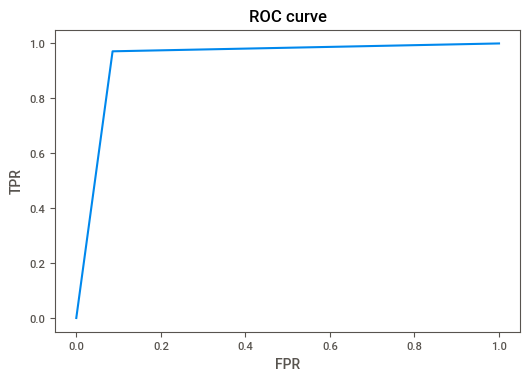

In [41]:
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()